# Task-2
* From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df.columns = ['sepal length','sepal width','petal length','petal width','species']
df.head()

,sepal length,sepal width,petal length,petal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.tail()

,sepal length,sepal width,petal length,petal width,species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(149, 5)

In [6]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

* in the given dataset , there is no missing value .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Exploratory Data Analysis

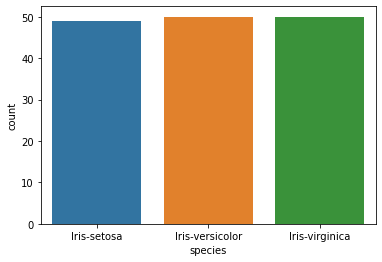

In [8]:
sns.countplot(df['species'])

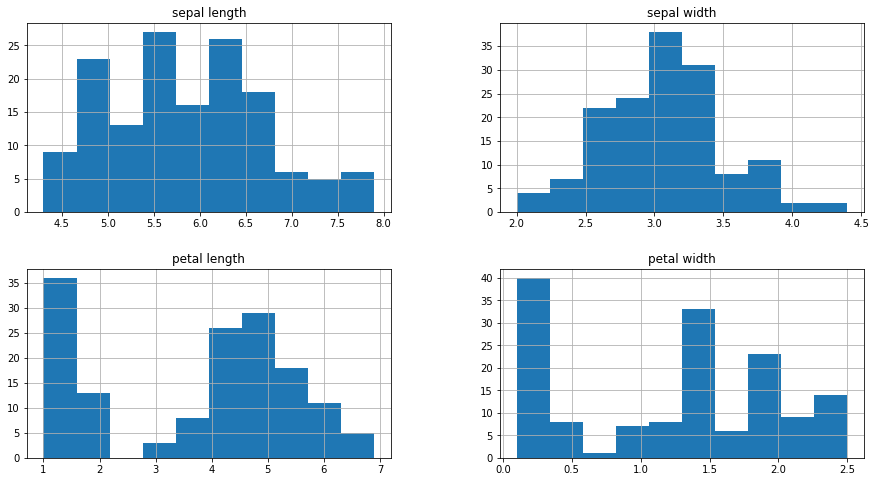

In [9]:
df.hist(figsize = (15 , 8),layout = (2,2))
plt.show()


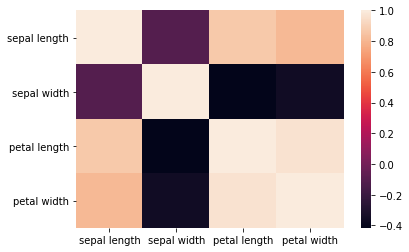

In [10]:
sns.heatmap(df.corr())
plt.show()

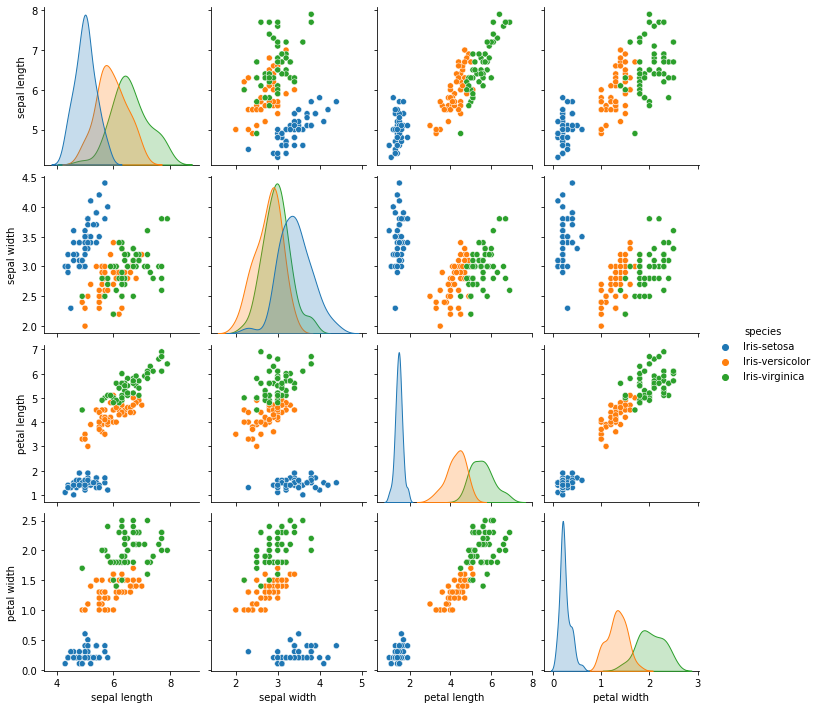

In [11]:
sns.pairplot(df,hue = 'species')
plt.show()

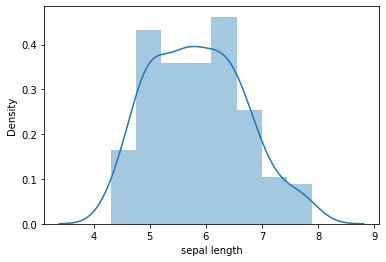

In [12]:
sns.distplot(df['sepal length'])
plt.show()

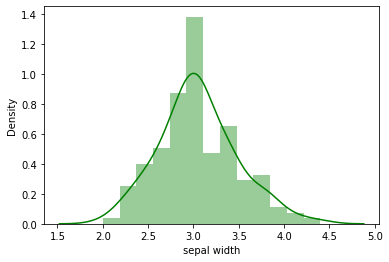

In [13]:
sns.distplot(df['sepal width'],color='green')
plt.show()

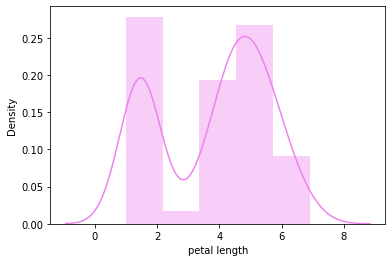

In [14]:
sns.distplot(df['petal length'],color='violet')
plt.show()

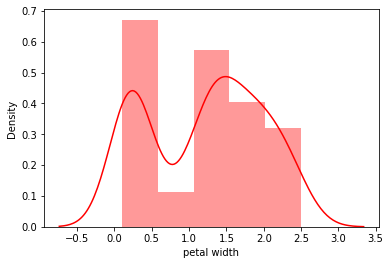

In [15]:
sns.distplot(df['petal width'],color = 'red')
plt.show()

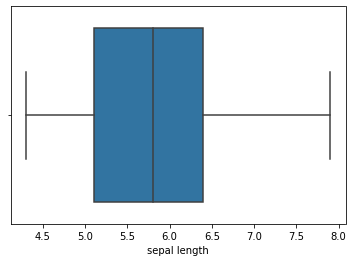

In [16]:
sns.boxplot(df['sepal length'])

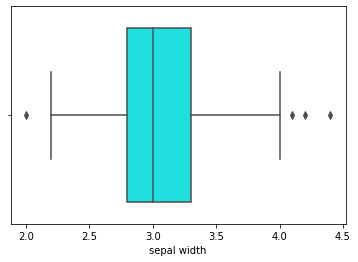

In [17]:
sns.boxplot(df['sepal width'],color = 'cyan')

*  sepal width contains Outliers.

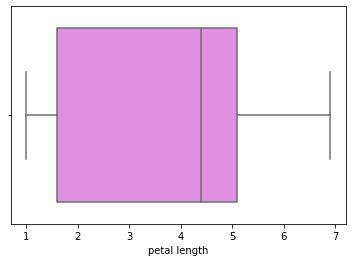

In [18]:
sns.boxplot(df['petal length'],color = 'violet')

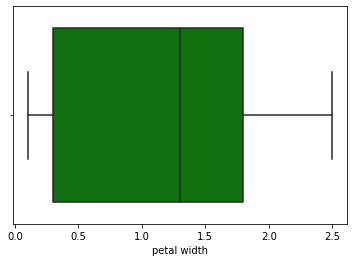

In [19]:
sns.boxplot(df['petal width'],color = 'green')

In [20]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

#     K-Means Clustering

* Finding the optimum number of clusters for k-means classification

In [21]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Visualising Result

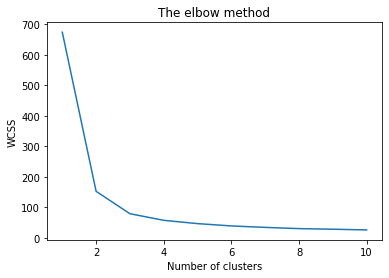

In [22]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Applying K-means to the Dataset

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Cluster Visualisation

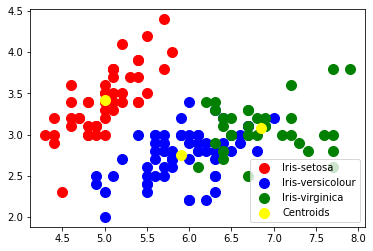

In [24]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()